In [1]:
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load processed data
df = pd.read_csv("../data/processed/chicago_crime_clean.csv")

# Spatial features only
X = df[["latitude", "longitude"]]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]


array([[-1.3407836 ,  1.5887858 ],
       [ 0.33784256, -0.44567728],
       [-1.09763698, -0.95686856],
       [ 1.5965144 , -2.32565142],
       [-0.76596277,  0.65812637]])

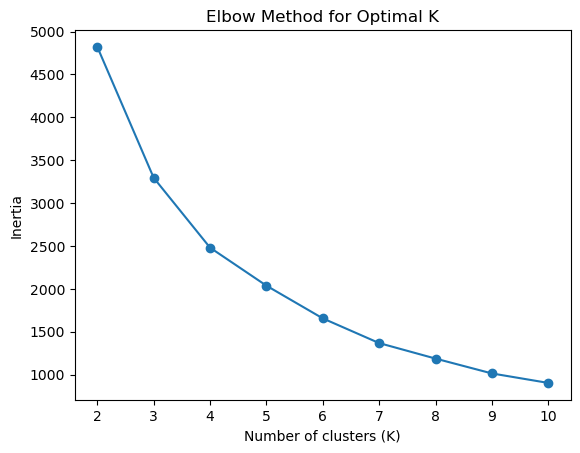

In [2]:
import matplotlib.pyplot as plt

inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


In [3]:
kmeans = KMeans(
    n_clusters=5,
    random_state=42,
    n_init=10
)

df["cluster"] = kmeans.fit_predict(X_scaled)

df[["latitude", "longitude", "cluster"]].head()


,latitude,longitude,cluster
0,41.731145,-87.574354,4
1,41.873808,-87.694456,2
2,41.751810,-87.724634,1
3,41.980779,-87.805438,0
4,41.779998,-87.629295,4


In [4]:
df["cluster"].value_counts()

cluster
4    1280
2    1100
0    1047
1     809
3     748
Name: count, dtype: int64

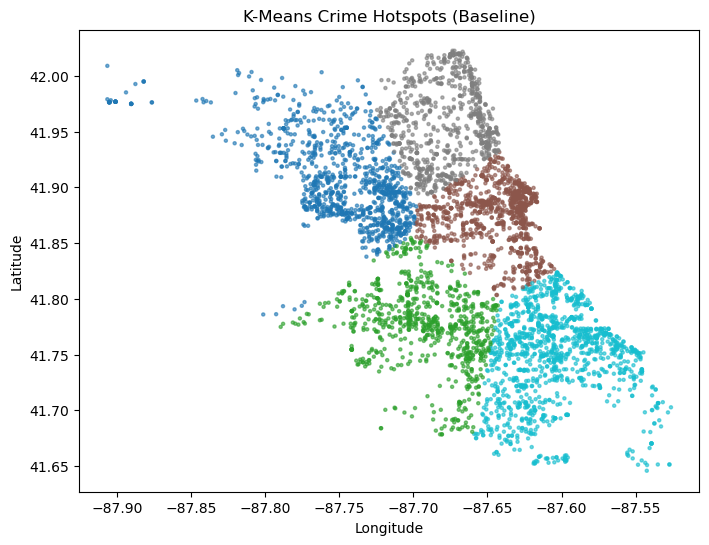

In [5]:
plt.figure(figsize=(8, 6))

plt.scatter(
    df["longitude"],
    df["latitude"],
    c=df["cluster"],
    cmap="tab10",
    s=5,
    alpha=0.6
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("K-Means Crime Hotspots (Baseline)")
plt.show()
